In [114]:
# Import the required modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [115]:
# Read the usage_stats.csv file from the Resources folder into a Pandas DataFrame
Lungcancerdata_df = pd.read_csv(
    Path("survey lung cancer.csv")
)

# Review the DataFrame
display(Lungcancerdata_df.head())
display(Lungcancerdata_df.tail())

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [116]:
#Drop the duplicates
Lungcancerdata_df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [117]:
# To find the minimum age
Lungcancerdata_df['AGE'].min()

21

In [118]:
#To find the maximum age
Lungcancerdata_df['AGE'].max()

87

In [119]:
#groupby sex for total count
groupby_gender = Lungcancerdata_df.groupby('GENDER')
groupby_gender.first()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,,,,,,,,,,,,,,,
F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES


In [120]:
#Total death count from the sample
total_female_male = groupby_gender['GENDER'].value_counts()
total_female_male

GENDER
F    147
M    162
Name: count, dtype: int64

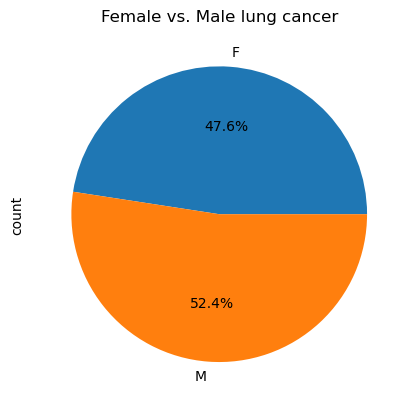

In [121]:
#Total percent of death count males and females 
total_female_male.plot(kind='pie', autopct='%1.1f%%', title='Female vs. Male lung cancer')
plt.savefig('Total count of male femle lung cancer.png')
plt.show()

## >  The data shows Male gets more lung cancer than female depend on the cause.

In [122]:
Lungcancerdata_df['bins'] = pd.cut(Lungcancerdata_df['AGE'], bins=[0,25,35,45,55,65,75,90], labels=["0-25","26-35","36-45", 
                                                                                                    "46-55", "56-65", "66-75","76-90"])
df = Lungcancerdata_df.groupby('bins').size()
df

bins
0-25       1
26-35      0
36-45      4
46-55     45
56-65    153
66-75     87
76-90     19
dtype: int64

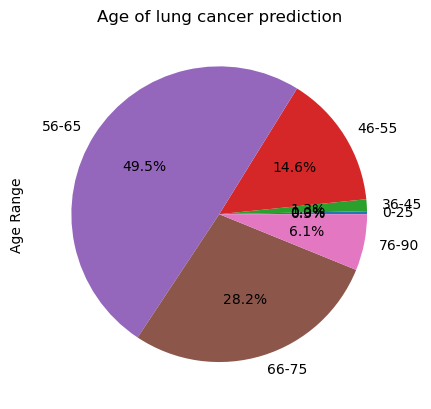

In [123]:
#plot the pie chart
df.plot(kind='pie', autopct='%1.1f%%',radius = 1, title='Age of lung cancer prediction', ylabel='Age Range')
plt.savefig('Age of lung Cancer prediction.png')
plt.show()

## The data shows Age Range 60 and above gets more lung cancer.

In [124]:
# Convert Gender- male to 1 and female to 0
Lungcancerdata_df['GENDER'] = Lungcancerdata_df['GENDER'].map({'M':1,'F':0})
new_data_df= Lungcancerdata_df.drop(columns='bins')
new_data_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [125]:
#Describe the 
Lungcancerdata_df.describe(include='object')

,LUNG_CANCER
count,309
unique,2
top,YES
freq,270


In [126]:
#give a binary 0 and  1 for prediction, yes:1, and no:0
new_data_df['LUNG_CANCER'] = new_data_df['LUNG_CANCER'].map({'YES':1,'NO':0})
new_data_df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [127]:
# split the data into X and y then into testing and training testa.
# Split the data into X (features) and y (LUNG_CANCER)
# The y variable should focus on the Lung_cancer column
y = new_data_df['LUNG_CANCER']

# The X variable should include all features except the LUNG_CANCER
X = new_data_df.drop(columns=['LUNG_CANCER'])


In [128]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [129]:
# Fit a logistic regression classifier
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

C:\Users\starb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
#Create the predicted value for training and testing data
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [131]:
#print a cofusion metrics for the training data
# Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[ 23   9]
 [  5 194]]


In [132]:
#print a confusion metrics for testing data
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[ 2  5]
 [ 3 68]]


In [133]:
#print the training classification report
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.96      0.97      0.97       199

    accuracy                           0.94       231
   macro avg       0.89      0.85      0.87       231
weighted avg       0.94      0.94      0.94       231



In [134]:
#print the testing classification report
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.93      0.96      0.94        71

    accuracy                           0.90        78
   macro avg       0.67      0.62      0.64        78
weighted avg       0.88      0.90      0.89        78



##> **Question**: How does the performance of the training and test dataset compare?

##> ** When we compare the training report and testing report , we get strong precision and recall on the test dataset, this is a good indication about how well the model is likely to perform in real life, That means all the reasons indicate for lung cancer, that's prediction is good. 